# Red Wine Quality Prediction Project 

By Rushda Shabbir

Batch - DS2405

# Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information
Input variables (based on physicochemical tests):-
1  - fixed acidity
2  - volatile acidity
3  - citric acid
4  - residual sugar
5  - chlorides
6  - free sulfur dioxide
7  - total sulfur dioxide
8  - density
9  - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

#Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/winequality-red.csv


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')



In [2]:
#importing dataset
df=pd.read_csv('Project Dataset\winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   

    alcohol  quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5  
5       9.4        5  
6       9.4        5  
7      10.0        7  
8       9.5        7  
9      10.5        5  
10      9.2        5  
11     10.5        5  
12      9.9        5  
13      9.1        5  
14      9.2        5

In [4]:
df.tail(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310         0.41             2.4      0.065   
1587            5.8             0.610         0.11             1.8      0.066   
1588            7.2             0.660         0.33             2.5      0.068   
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1584                 24.0                  34.0  0.99484  3.29       0.80   
1585                 22.0                  48.0  0.99494  3.30       0.84   
1586                 34.0                  60.0  0.99492  3.34       0.85   
1587                 18.0                  28.0  0.99483  3.55       0.66   
1588                 34.0                 102.0  0.99414  3.27       0.78   
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1584     11.6        7  
1585     11.5        6  
1586     11.4        6  
1587     10.9        6  
1588     12.8        6  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
129             6.1             0.380         0.15            1.80      0.072   
388             7.8             0.460         0.26            1.90      0.088   
1193            6.4             0.885         0.00            2.30      0.166   
331            10.2             0.360         0.64            2.90      0.122   
326            11.6             0.530         0.66            3.65      0.121   
1027            6.4             0.795         0.00            2.20      0.065   
1376            8.2             0.885         0.20            1.40      0.086   
1164            9.0             0.785         0.24            1.70      0.078   
150             7.3             0.330         0.47            2.10      0.077   
500             7.8             0.520         0.25            1.90      0.081   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
129                   6.0                  19.0  0.99550  3.42       0.57   
388                  23.0                  53.0  0.99810  3.43       0.74   
1193                  6.0                  12.0  0.99551  3.56       0.51   
331                  10.0                  41.0  0.99800  3.23       0.66   
326                   6.0                  14.0  0.99780  3.05       0.74   
1027                 28.0                  52.0  0.99378  3.49       0.52   
1376                  7.0                  31.0  0.99460  3.11       0.46   
1164                 10.0                  21.0  0.99692  3.29       0.67   
150                   5.0                  11.0  0.99580  3.33       0.53   
500                  14.0                  38.0  0.99840  3.43       0.65   

      alcohol  quality  
129       9.4        5  
388       9.2        6  
1193     10.8        5  
331      12.5        6  
326      11.5        7  
1027     11.6        5  
1376     10.0        5  
1164     10.0        5  
150      10.3        6  
500       9.0        6

# Exploratory Data Analysis(EDA)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
#CHECKING DIMENTION
print("no. rows",df.shape[0])
print("no. Columns",df.shape[1])

no. rows 1599
no. Columns 12


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
#Groups columns by data type
df.columns.to_series().groupby(df.dtypes).groups


{int64: ['quality'], float64: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']}

In [11]:
# checking the types of columns and all information about atributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Comment

This dataset contains 1599 rows and 12 columns. Out of which 1 is the target variable "quality" and the remaining 11 are independent variables which described in the Attribute Information.

There are two different types of data (int64, and float) present in the dataset.
There is no null values.
All the independent variables are represented as a number.

In [12]:
#checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum().sum()

0

In [14]:
# Checking the '0' values in the dataset
(df==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

#Citric Acid has 132 values of '0' and others columns has not 0 values

<Axes: >

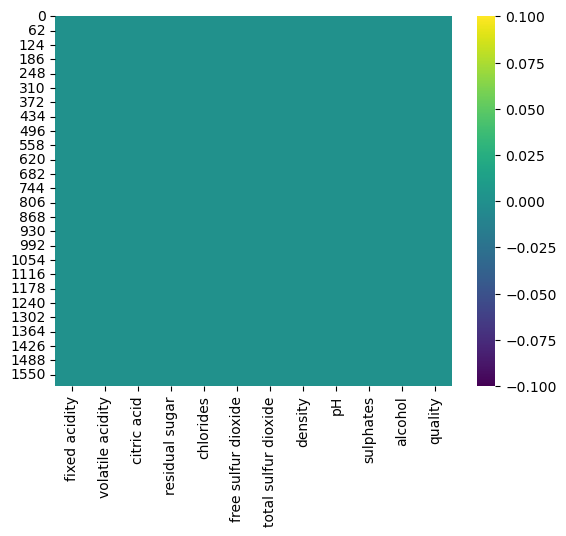

In [15]:
# Lets visualize by using heatmap
sns.heatmap(df.isnull(), cmap='viridis')

In [16]:
#check no. of unique values in every columns
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [17]:
# check unique values in target variable
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
# check unique values counts in target Variable
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# comements

Here we can see the output variable quality present 6 unique values outo f 1599 records. 
this is a classification problem. As we can see the dataset is not balanced there are significant differences between the number of records from outputs 3, 4, and 8 compared to the number of records from outputs 5, and 6.

In [19]:
#checking the values counts of each columns
for i in range(11):
    print(df.iloc[:,i].value_counts(),'\n')


fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64 

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64 

citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64 

residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64 

chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64 

free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

# Statstics Summary of the Dataset

In [20]:
# summary statistics of numerical columns
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

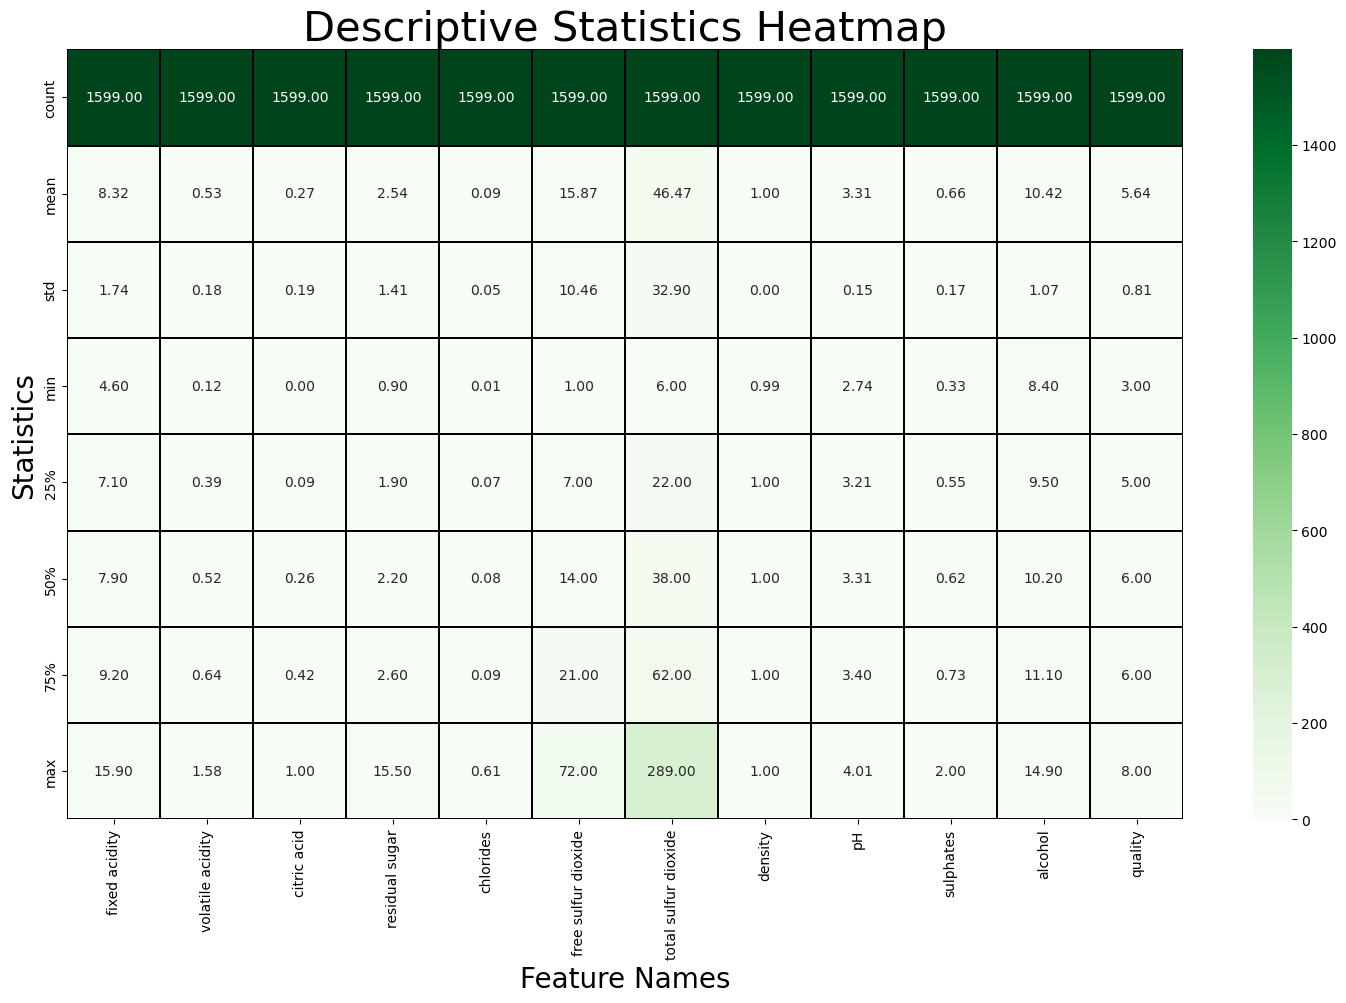

In [55]:
def plot_statistical_summary_heatmap(data=df, figsize=(18, 10),cmap='Green'):
    statistical_summary = df.describe()
    plt.figure(figsize=figsize)
    sns.heatmap(data=statistical_summary,annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap='Greens')
    plt.xlabel('Feature Names', fontsize=20)
    plt.ylabel('Statistics', fontsize=20)
    plt.title('Descriptive Statistics Heatmap', fontsize=30)
    plt.show()

# call function
plot_statistical_summary_heatmap()

# comments on statistics Summary

This give the statistical information of the numerical columns. There is not negative/invalid values present.

From the above description we can observe the following:

1.The counts of all the columns are the same which confirms there are no missing values in the dataset.
2.The mean value is greater than the median(50%) in every column.
3.columns which means the data is skewed to the right side in all columns.
4.there is a significant difference between the maximum value and the 75th percentile , we must investigate the existence  
  of outliers in the data. In columns: residual sugar, free sulfer dioxide, total sulfer dioxide.
5.Minimum value of citric acid is zero. Need to check if it valid data or some kind of data error.
6.If we consider spread of data based on mean/std & right/left side skewed data based on 3rd quartile and max, we can   
  definitely say that outliers are present in the data.



In [22]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Comments on Skewness
By the above data we can see that residual sugar,chlorides are having highly skewed. & 
=> free sulfur dioxide, total sulfur dioxide ,sulphates are also having skewness and
=> alcohol and fixed acidity columns are having less skewed data.

In [23]:
#check duplicate data
print("find the duplicate values :", df.duplicated())

find the duplicate values : 0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool


In [24]:
#check duplicate data
print("find the duplicate values :", df.duplicated().sum())

find the duplicate values : 240


In [43]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [25]:
# show duplicate values
df.iloc[[4,1596],:]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4              0.70         0.00             1.9      0.076   
1596            6.3              0.51         0.13             2.3      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
1596     11.0        6

#here we can observe the total dublicates 240 values present in the dataset like same values in chlorides column

# Data Visualization

univeriate Analysis

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Distribution of the Data

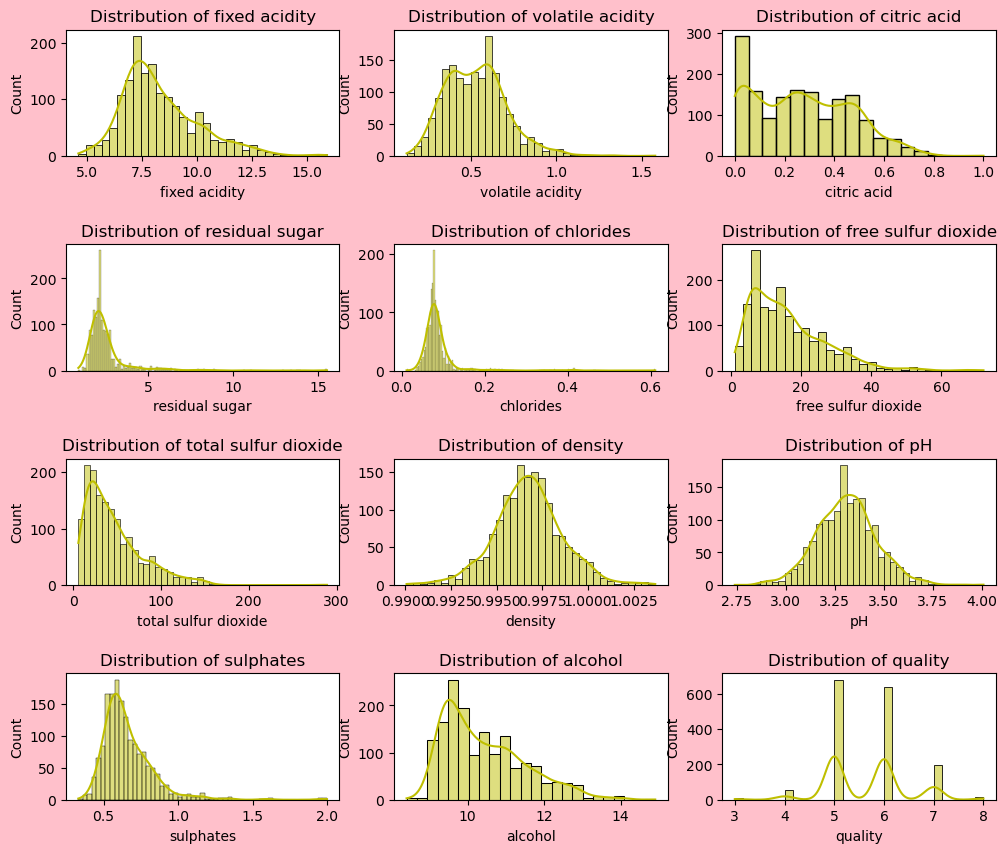

In [58]:
# Visualizing the distribution of the columns with the mean>median = right skewed data
col_right_skew=['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates', 'alcohol','quality' ]

fig, plot= plt.subplots(4,3,figsize=(12,10),facecolor='pink')
for ax ,column in zip(plot.flat,col_right_skew):
    sns.histplot(data=df,x=column,ax=ax,kde=True,color='y')
    ax.set_title(f"Distribution of {column}")
    
plt.subplots_adjust(hspace=0.7)
plt.show()

# Comments on distribution subplots


I mentioned before in every columns skewness present But in =>'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', and 'sulphates' is highly skewed to the right.
Skewed data can affect the performance of the machine learning models so we are going to transform it.

The columns :'fixed acidity', 'volatile acidity', 'citric acid'  and 'alcohol' are slightly skewed towards the right.
The columns :'density','pH' are Normal distributed and the target variable 'quality' it can imblance data.i will check it next step


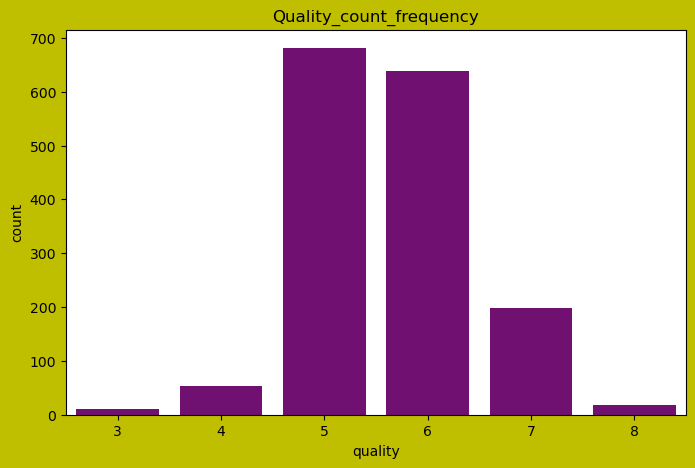

In [75]:
# check quality target variable frequency data value
plt.figure(figsize = (8, 5),facecolor='y')
sns.countplot(data=df, x='quality', color='purple')
plt.title(f"Quality_count_frequency")
plt.show()

# comments on countplot of target variable

here we can see data is imblance in quality variable. There are significantly more records for wine quality 5 and 6 compared to the cases of quality 3, 4, 7 and 8. So we will rectify it by using the oversampling method in the later part.


 Bivariate Analysis

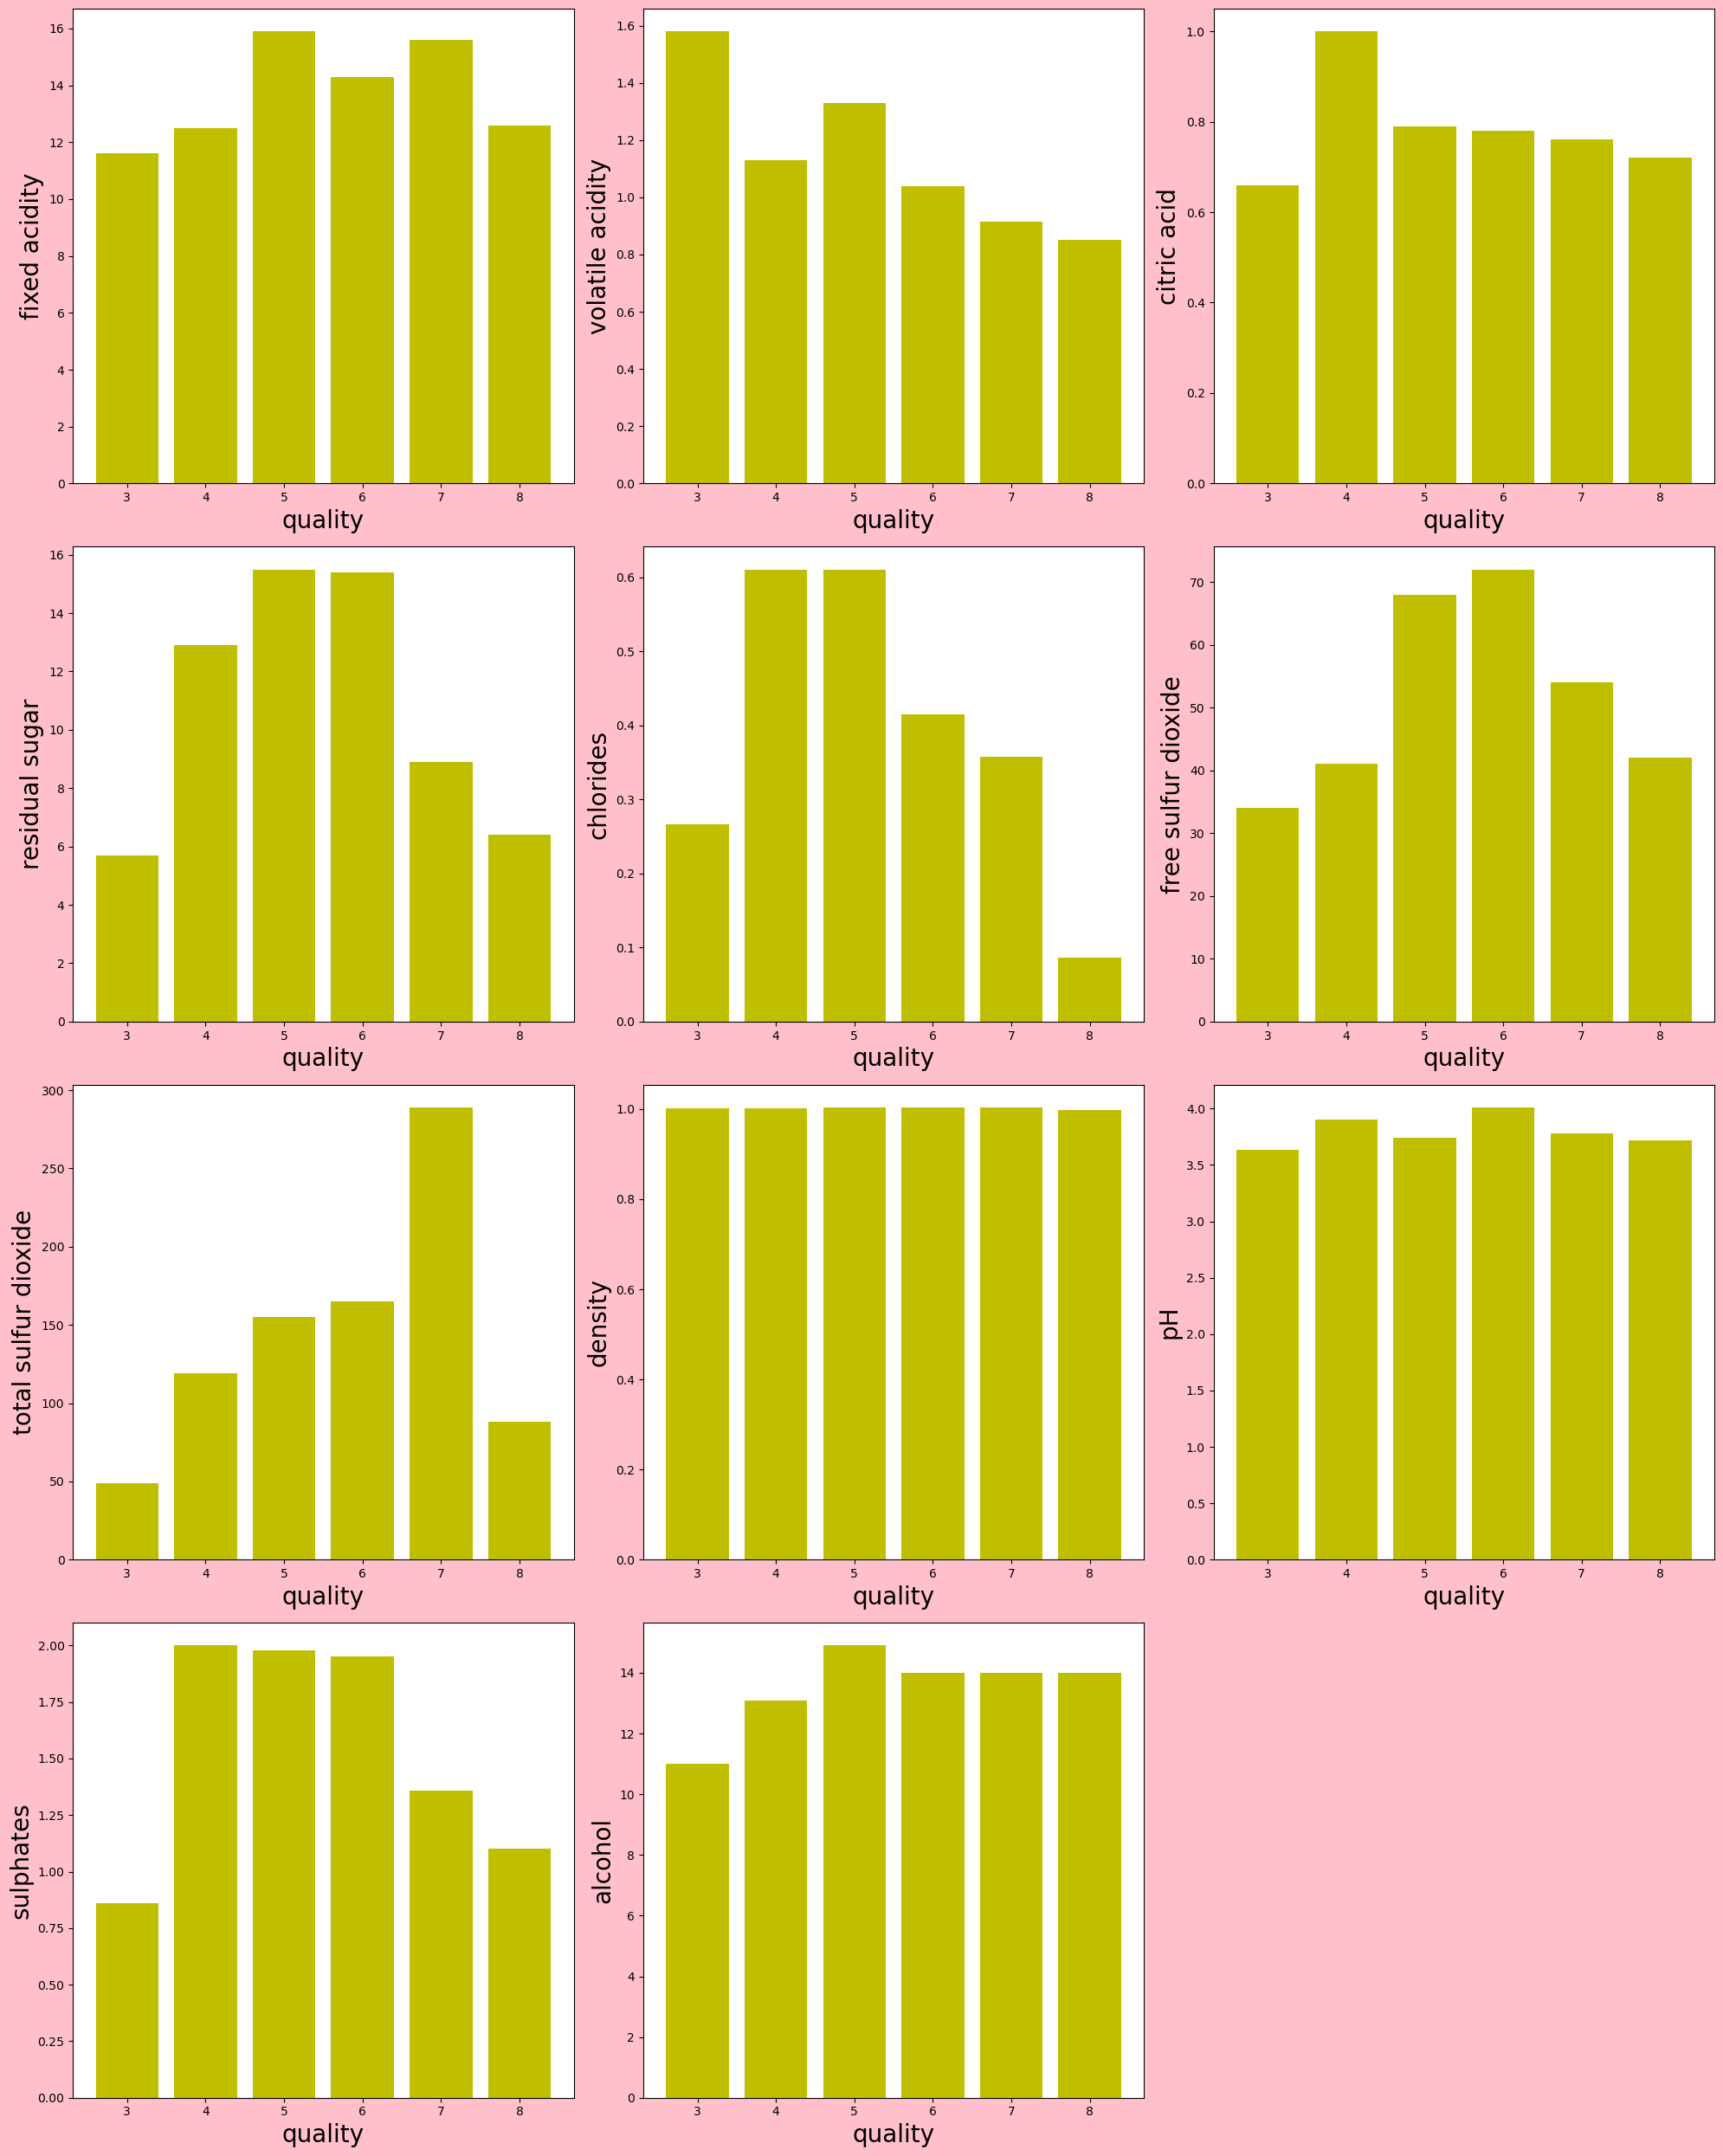

In [63]:
plt.figure(figsize=(20,25), facecolor='pink')
p =1
for column in df:
    if p <=11:
        plt.subplot(4,3,p)
        plt.bar(df['quality'], df[column], color='y') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    p+=1
plt.tight_layout()
plt.show()

# comments
Based on quality

Good quality (grade 7 & 8) of wine posses higher amount in ,'free sulfur dioxide', 'total sulfur dioxide',and 'fixed acidity'.
Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 40-55.
Low grade quality of wine posses lower amount of total sulfer dioxide.


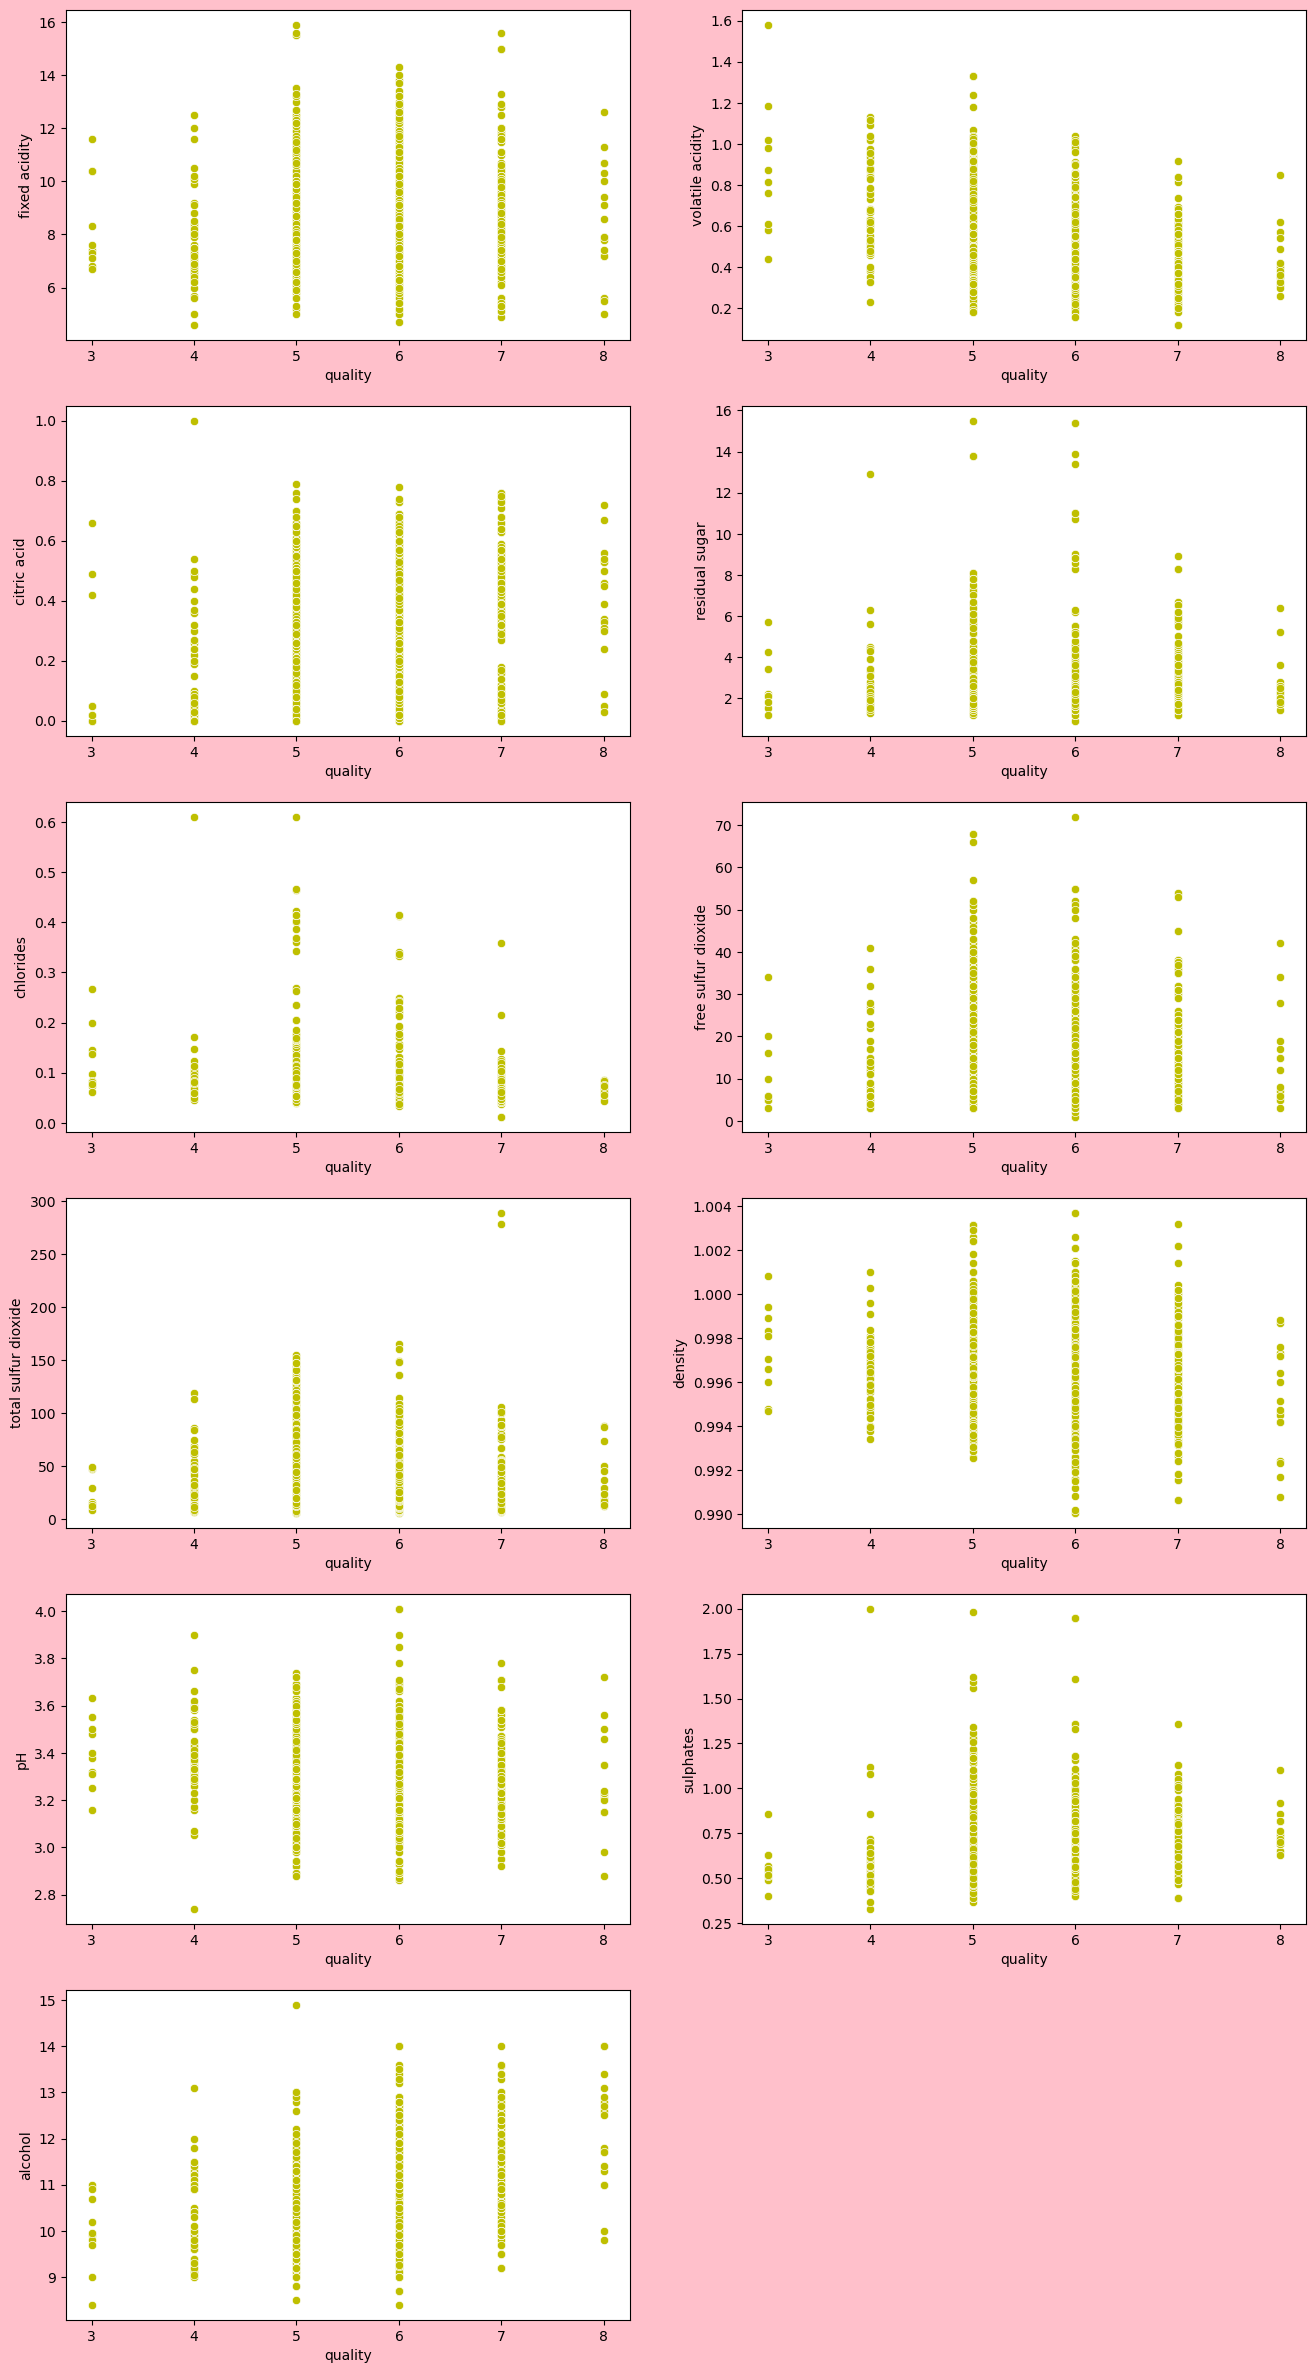

In [69]:
# check Relationship each independent with quality variable 
plt.figure(figsize=(16,30),facecolor='pink')
p = 1
for i in df:
    if p<=11:  
        plt.subplot(6,2,p)  
        sns.scatterplot(x='quality',y=i,data=df,color='y') 
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
plt.show()

# Check Outliers

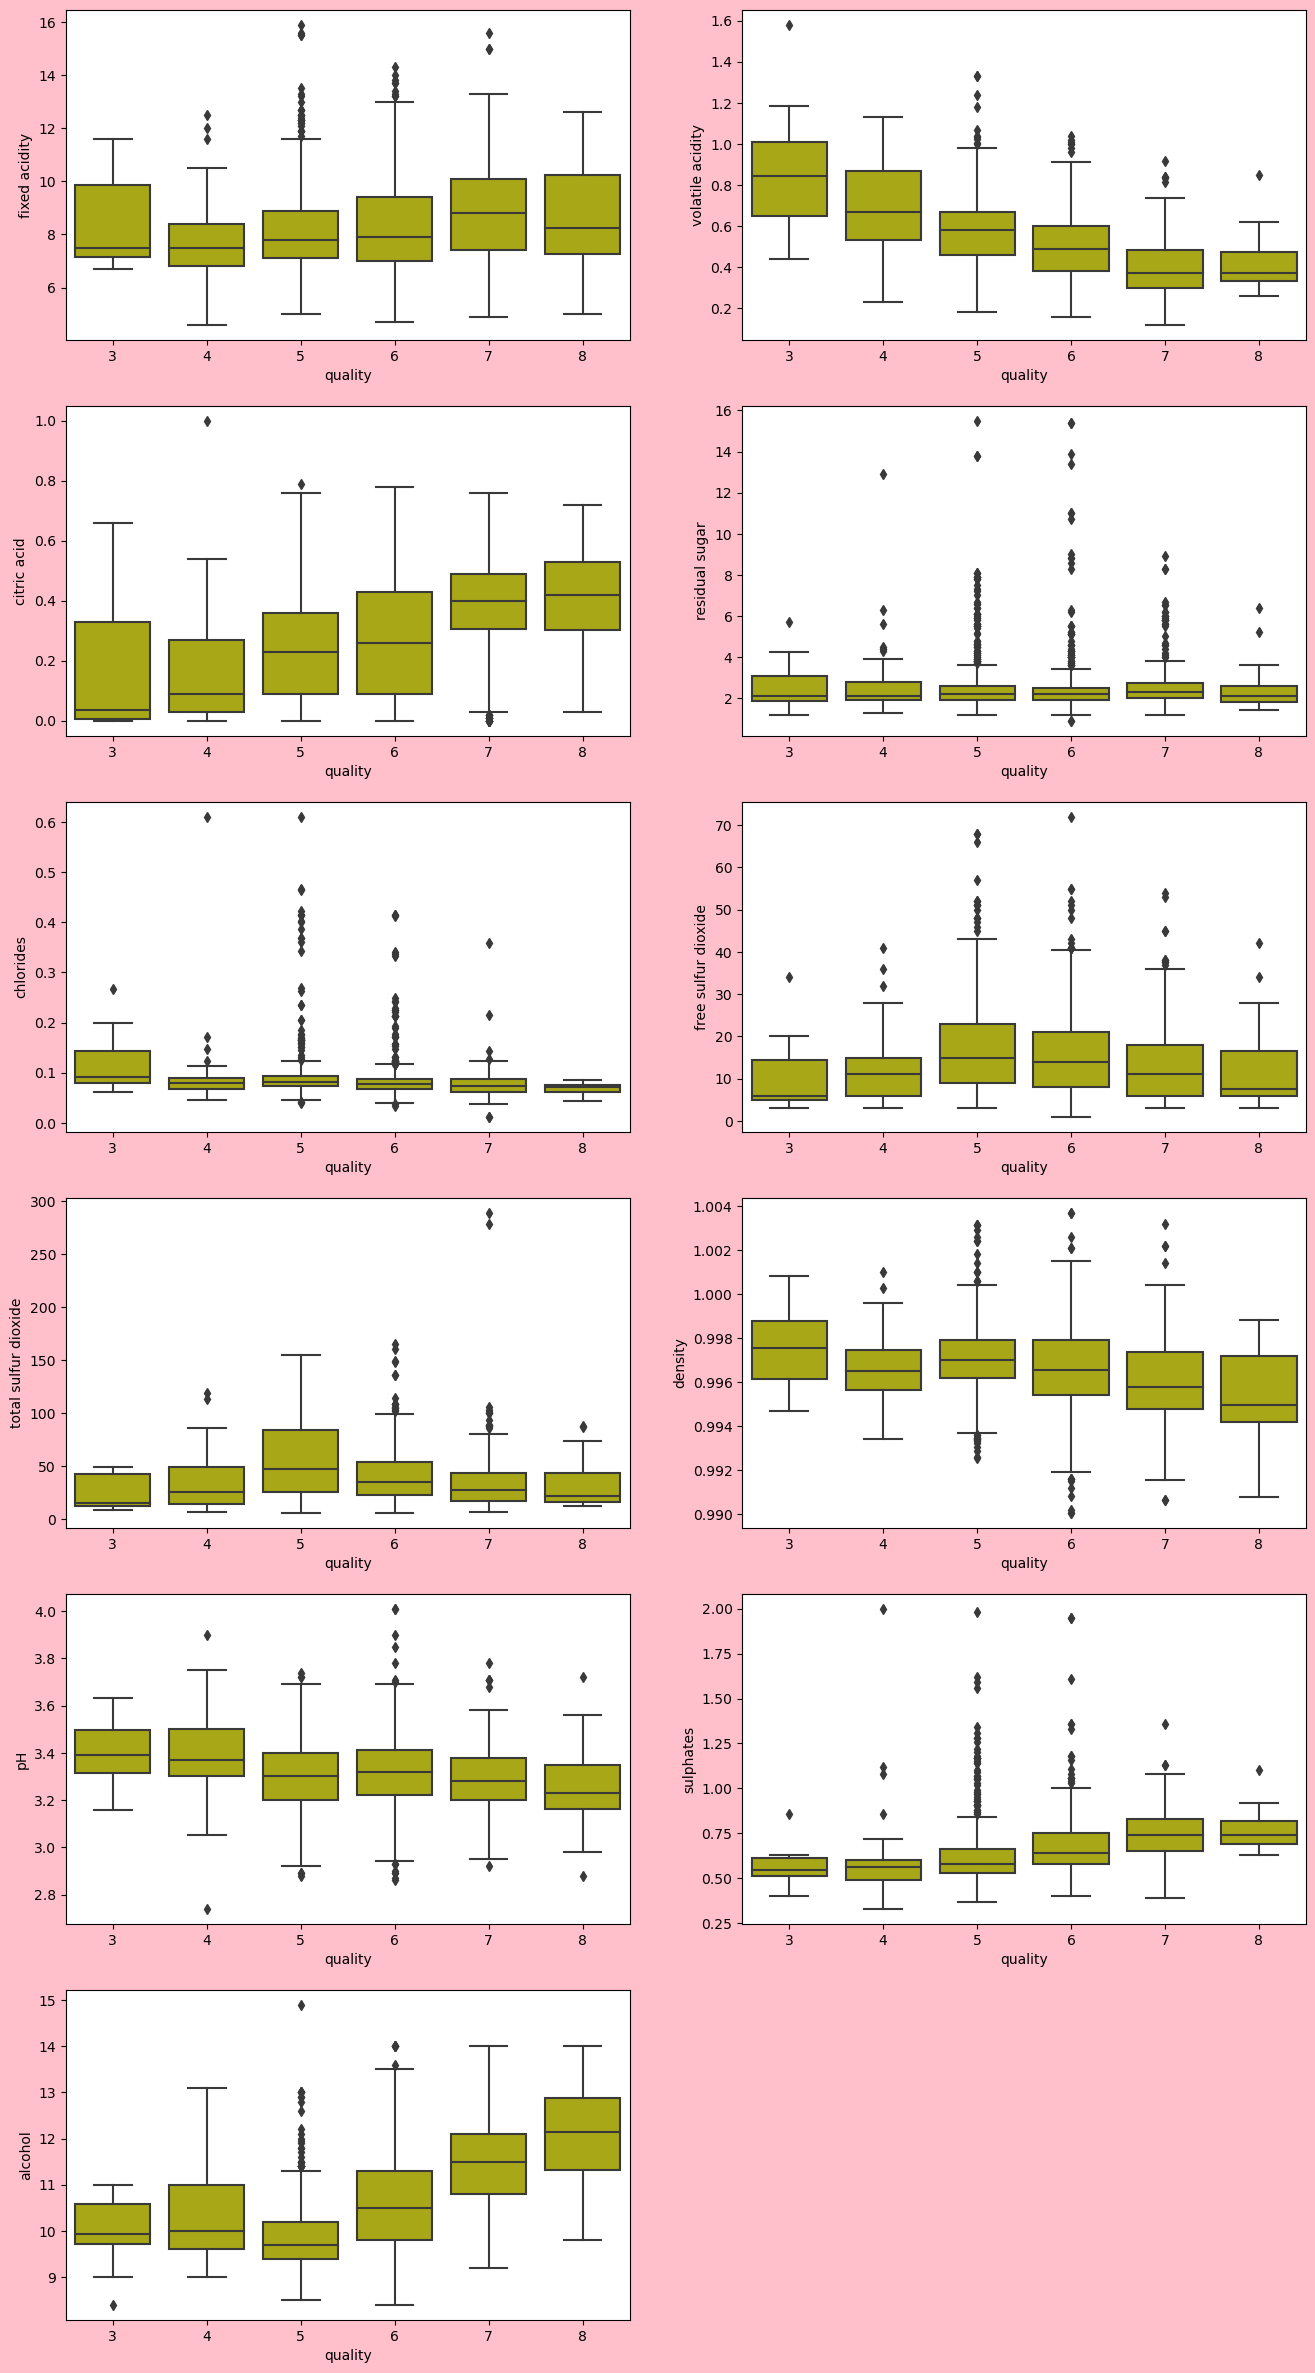

In [68]:
# check Outliers each independent with quality variable 
plt.figure(figsize=(16,30),facecolor='pink')
p = 1
for i in df:
    if p<=11:  
        plt.subplot(6,2,p)  
        sns.boxplot(x='quality',y=i,data=df,color='y') 
        plt.xlabel('quality')
        plt.ylabel(i)
    p+=1
plt.show()

# comments
We can observe there are outliers in almost each independent variable, with the exception in the citric acid it has less outliers as comparision to others.

# Removing the outliers

In [81]:
from scipy.stats import zscore
#using z score for removing outliers and calucating absolute zscore
z = np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(1451, 12)

In [96]:
# after removing outliers new data details
loss_percent=(1599-1451)/1599*100
print('during the removing outlier we loss',loss_percent,"% data")
print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new
df

during the removing outlier we loss 9.255784865540964 % data
148 rows with outliers were deleted.
This represent 9.26% of the data.
In the new dataset there are 1451 rows and 12 columns.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [98]:
#checking skewness again
df.skew().sort_values(ascending=False)

residual sugar          2.456107
chlorides               2.275162
total sulfur dioxide    1.183161
sulphates               0.891492
free sulfur dioxide     0.869250
fixed acidity           0.823934
alcohol                 0.758958
quality                 0.407865
volatile acidity        0.380659
citric acid             0.291297
pH                      0.114705
density                 0.055738
dtype: float64

# comments on skewness
the skewness of the columns:

residual sugar          2.456107
chlorides               2.275162
total sulfur dioxide    1.183161
sulphates               0.891492
free sulfur dioxide     0.869250
fixed acidity           0.823934
alcohol                 0.758958

is greater than 0.5, we are going to apply methods to remove it.

# Removing skewness

by cuberoot method

In [99]:
# Removing skewness using cuberoot method
df_remove_skew = pd.DataFrame(data=df)
df_remove_skew['residual sugar'] = np.cbrt(df['residual sugar'])
df_remove_skew['chlorides'] = np.cbrt(df['chlorides'])
df_remove_skew['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])
df_remove_skew['sulphates']= np.cbrt(df['sulphates'])
df_remove_skew['free sulfur dioxide'] = np.cbrt(df['free sulfur dioxide'])
df_remove_skew['fixed acidity'] = np.cbrt(df['fixed acidity'])
df_remove_skew['alcohol'] = np.cbrt(df['alcohol'])

In [100]:
# Cheking the skewness of the data again after applying cuberoot method
df_remove_skew.skew().sort_values(ascending=False)

residual sugar          1.629524
chlorides               1.020246
alcohol                 0.646678
fixed acidity           0.529105
sulphates               0.523901
quality                 0.407865
volatile acidity        0.380659
total sulfur dioxide    0.342621
citric acid             0.291297
free sulfur dioxide     0.125799
pH                      0.114705
density                 0.055738
dtype: float64

# commemts 
here we can see after apply cuberoot method skewness still present so we have need apply Log transformation method for the columns the skewness remains > 0.5 .


In [104]:
# Removing skewness using Log transformation
df_remove_skew['residual sugar'] = np.log(df_remove_skew['residual sugar'])
df_remove_skew['chlorides'] = np.log(df_remove_skew['chlorides'])
df_remove_skew['alcohol'] = np.log(df_remove_skew['alcohol'])
df_remove_skew['fixed acidity'] = np.log(df_remove_skew['fixed acidity'])
df_remove_skew['sulphates'] = np.log(df_remove_skew['sulphates'])

In [105]:
#Cheking the skewness of the data again after applying Log Transformation method
df_remove_skew.skew().sort_values(ascending=False)

residual sugar          1.227096
alcohol                 0.592414
chlorides               0.496272
quality                 0.407865
volatile acidity        0.380659
fixed acidity           0.377931
total sulfur dioxide    0.342621
sulphates               0.342375
citric acid             0.291297
free sulfur dioxide     0.125799
pH                      0.114705
density                 0.055738
dtype: float64

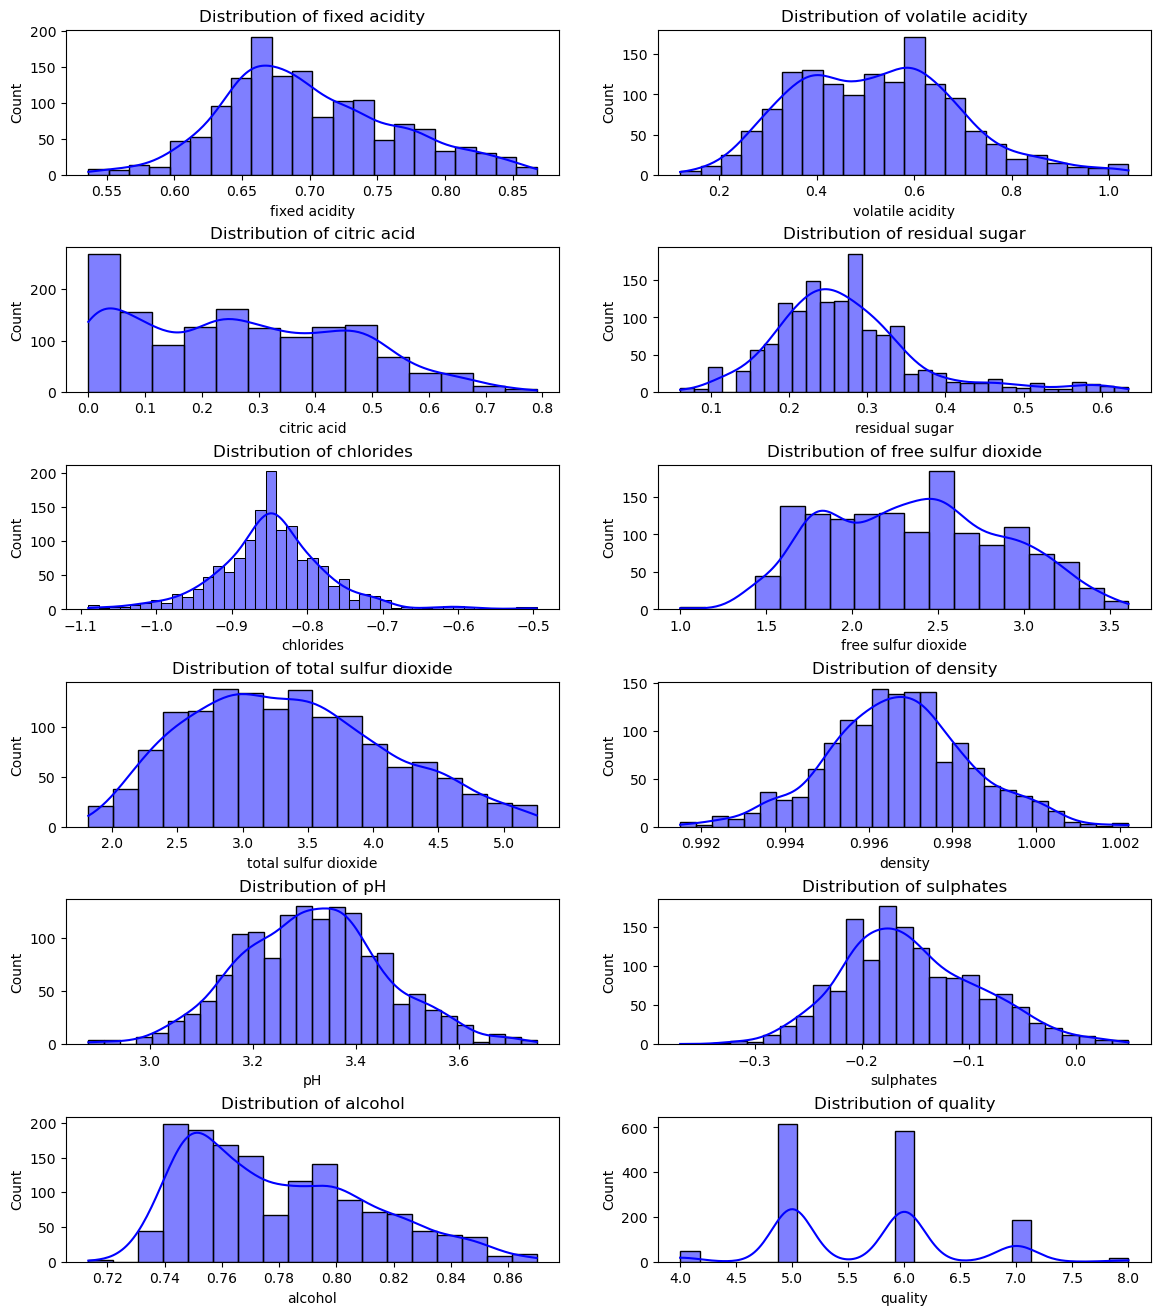

In [114]:
#again check distribution of the data
fig, plot= plt.subplots(6, 2, figsize=(14, 16))
for ax, column in zip(plot.flat, df_remove_skew.columns):
    sns.histplot(data=df_remove_skew, x=column, ax=ax, kde=True, color='b')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

Now data normally distributed

In [115]:
# transform data in df
df = df_remove_skew

# Multivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


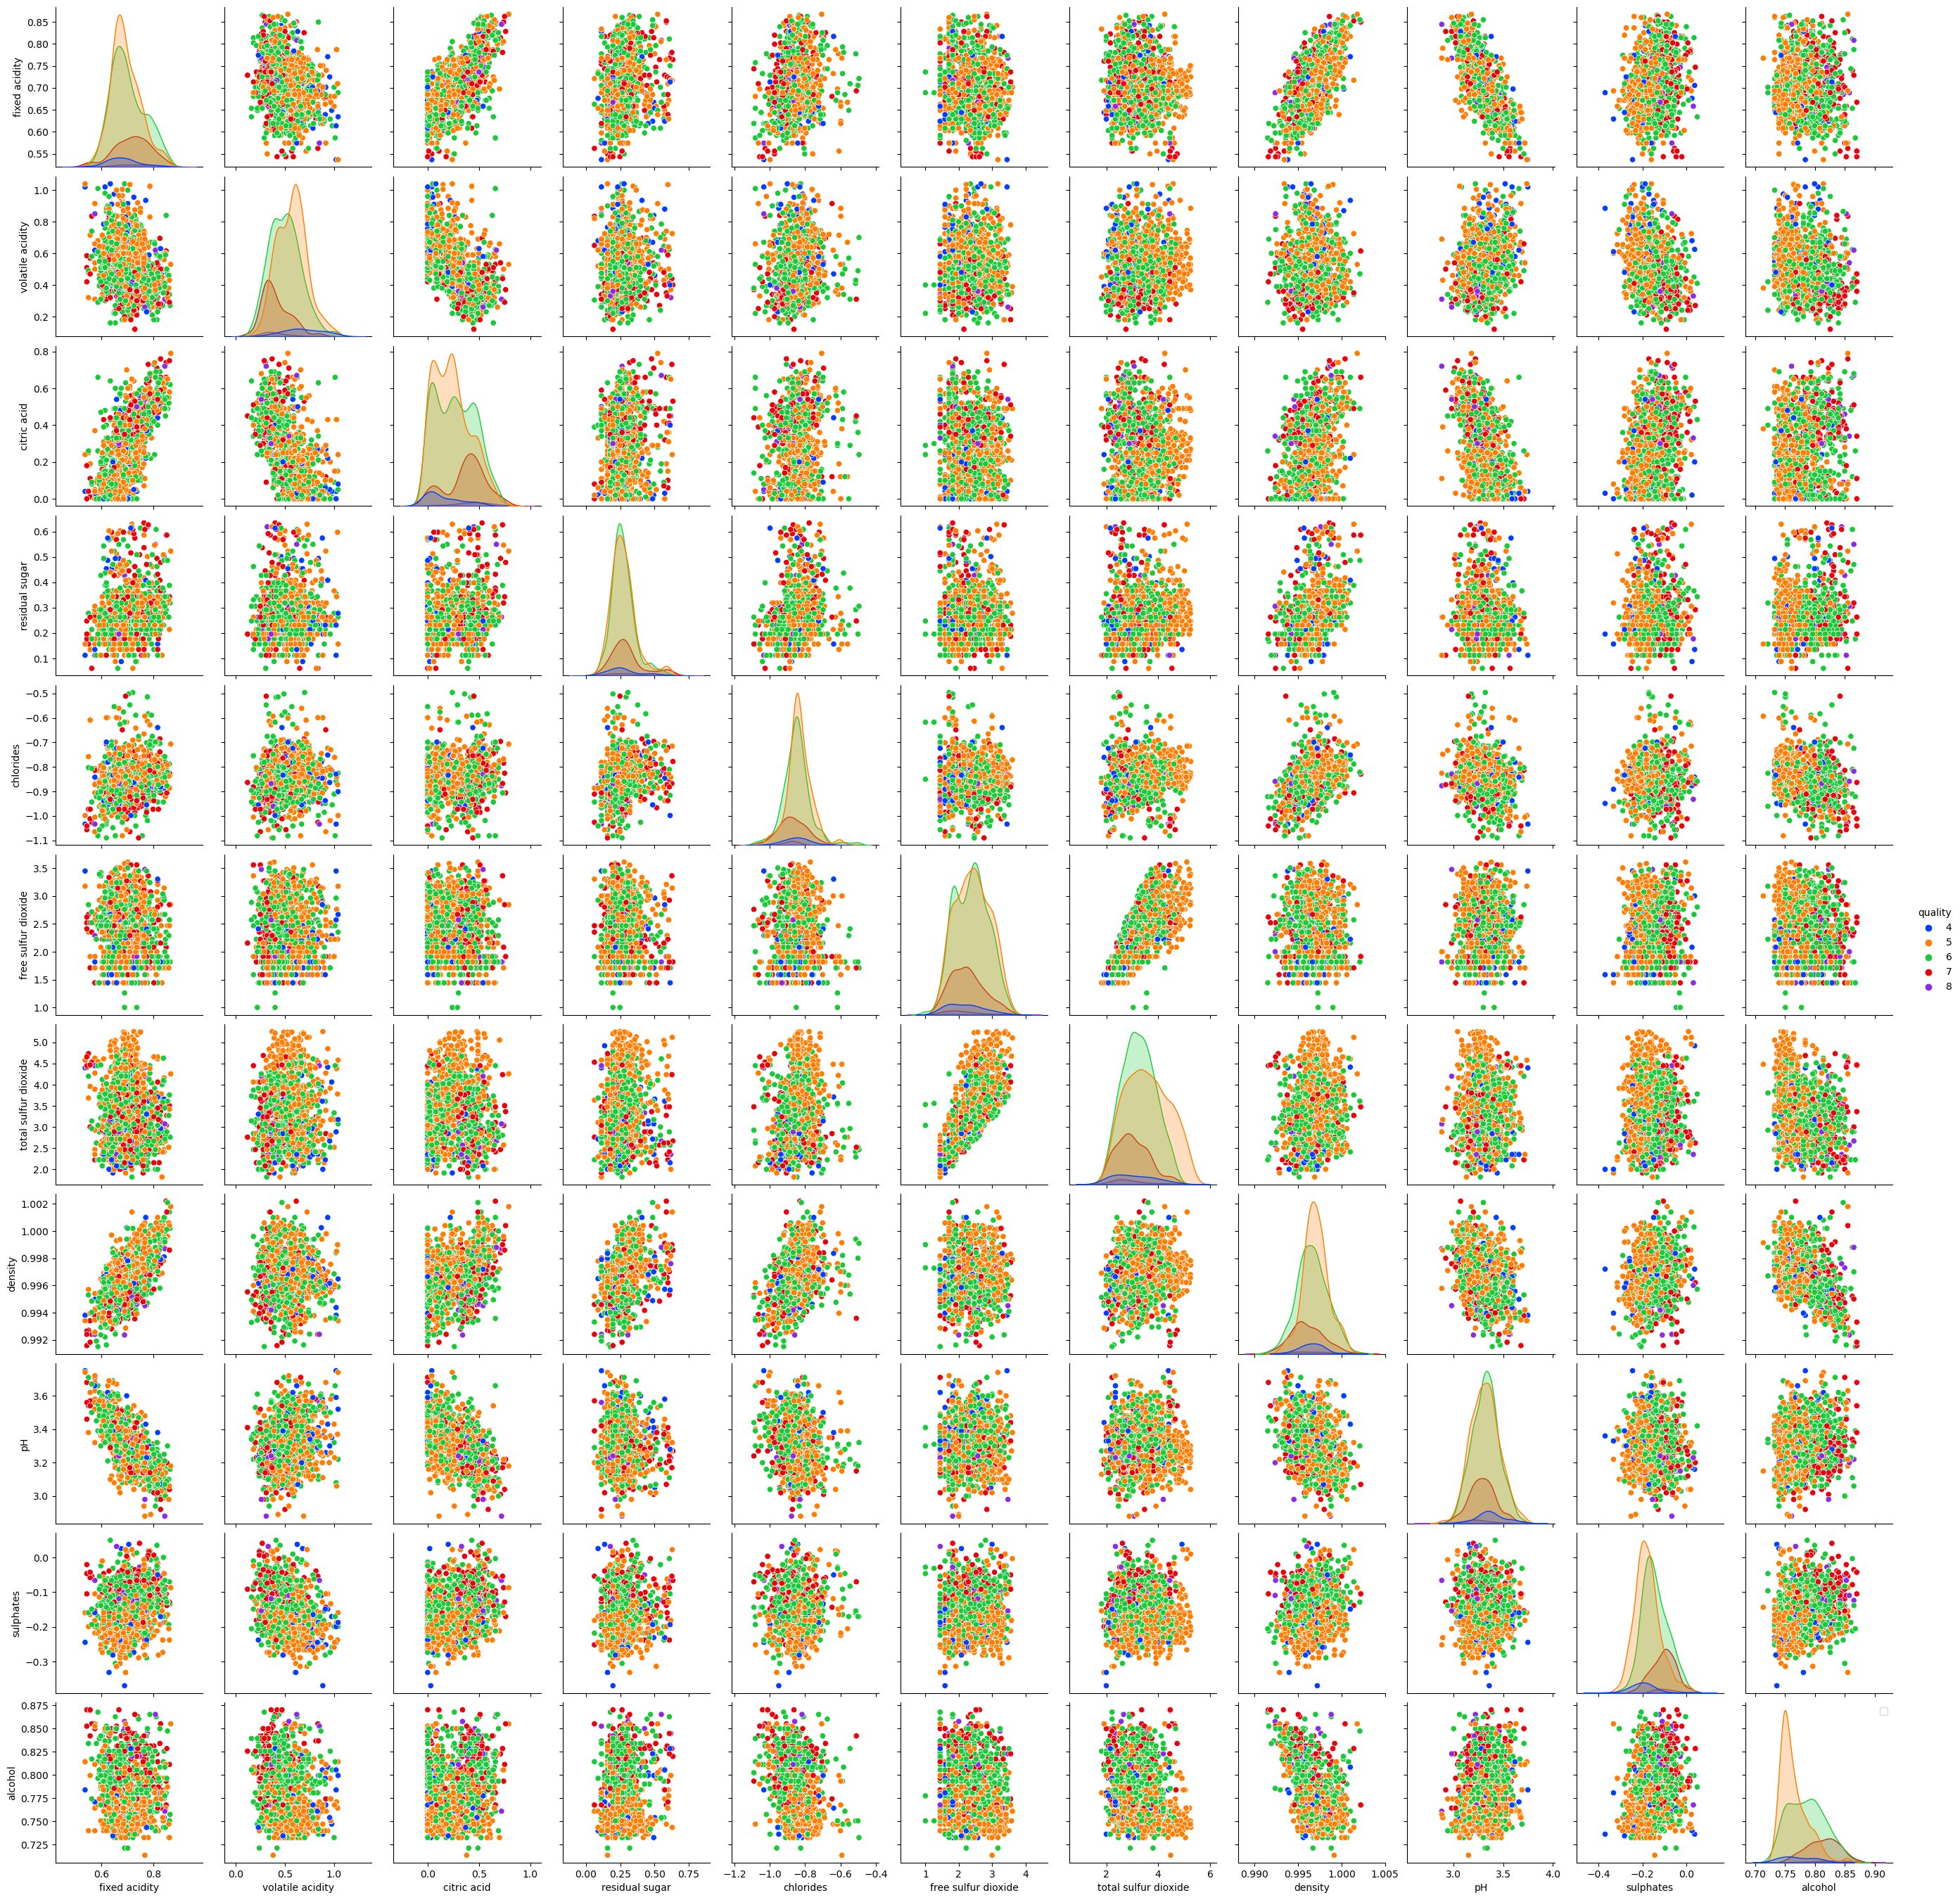

In [118]:
sns.pairplot(df, hue = "quality", palette = "bright")
plt.show()

# Correlation between target variable and independent variables.

In [119]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296513     0.691118   
volatile acidity          -0.296513          1.000000    -0.589452   
citric acid                0.691118         -0.589452     1.000000   
residual sugar             0.209131          0.031023     0.194626   
chlorides                  0.228840          0.082052     0.100857   
free sulfur dioxide       -0.166197          0.038668    -0.100366   
total sulfur dioxide      -0.097693          0.108985    -0.018505   
density                    0.663494         -0.004957     0.371729   
pH                        -0.722263          0.251343    -0.520311   
sulphates                  0.190488         -0.353628     0.307876   
alcohol                   -0.035899         -0.213544     0.168325   
quality                    0.138709         -0.353443     0.243999   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.209131   0.228840            -0.166197   
volatile acidity            0.031023   0.082052             0.038668   
citric acid                 0.194626   0.100857            -0.100366   
residual sugar              1.000000   0.189858             0.017604   
chlorides                   0.189858   1.000000            -0.029145   
free sulfur dioxide         0.017604  -0.029145             1.000000   
total sulfur dioxide        0.110484   0.082168             0.750805   
density                     0.385529   0.392360            -0.039172   
pH                         -0.079224  -0.202450             0.128579   
sulphates                   0.073230  -0.001103             0.049318   
alcohol                     0.161775  -0.256679            -0.088711   
quality                     0.056116  -0.138821            -0.074490   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.097693  0.663494 -0.722263   0.190488   
volatile acidity                  0.108985 -0.004957  0.251343  -0.353628   
citric acid                      -0.018505  0.371729 -0.520311   0.307876   
residual sugar                    0.110484  0.385529 -0.079224   0.073230   
chlorides                         0.082168  0.392360 -0.202450  -0.001103   
free sulfur dioxide               0.750805 -0.039172  0.128579   0.049318   
total sulfur dioxide              1.000000  0.135713  0.022617  -0.012350   
density                           0.135713  1.000000 -0.312310   0.135509   
pH                                0.022617 -0.312310  1.000000  -0.024869   
sulphates                        -0.012350  0.135509 -0.024869   1.000000   
alcohol                          -0.271330 -0.463601  0.136486   0.255090   
quality                          -0.220936 -0.167568 -0.082164   0.402169   

                       alcohol   quality  
fixed acidity        -0.035899  0.138709  
volatile acidity     -0.213544 -0.353443  
citric acid           0.168325  0.243999  
residual sugar        0.161775  0.056116  
chlorides            -0.256679 -0.138821  
free sulfur dioxide  -0.088711 -0.074490  
total sulfur dioxide -0.271330 -0.220936  
density              -0.463601 -0.167568  
pH                    0.136486 -0.082164  
sulphates             0.255090  0.402169  
alcohol               1.000000  0.500866  
quality               0.500866  1.000000

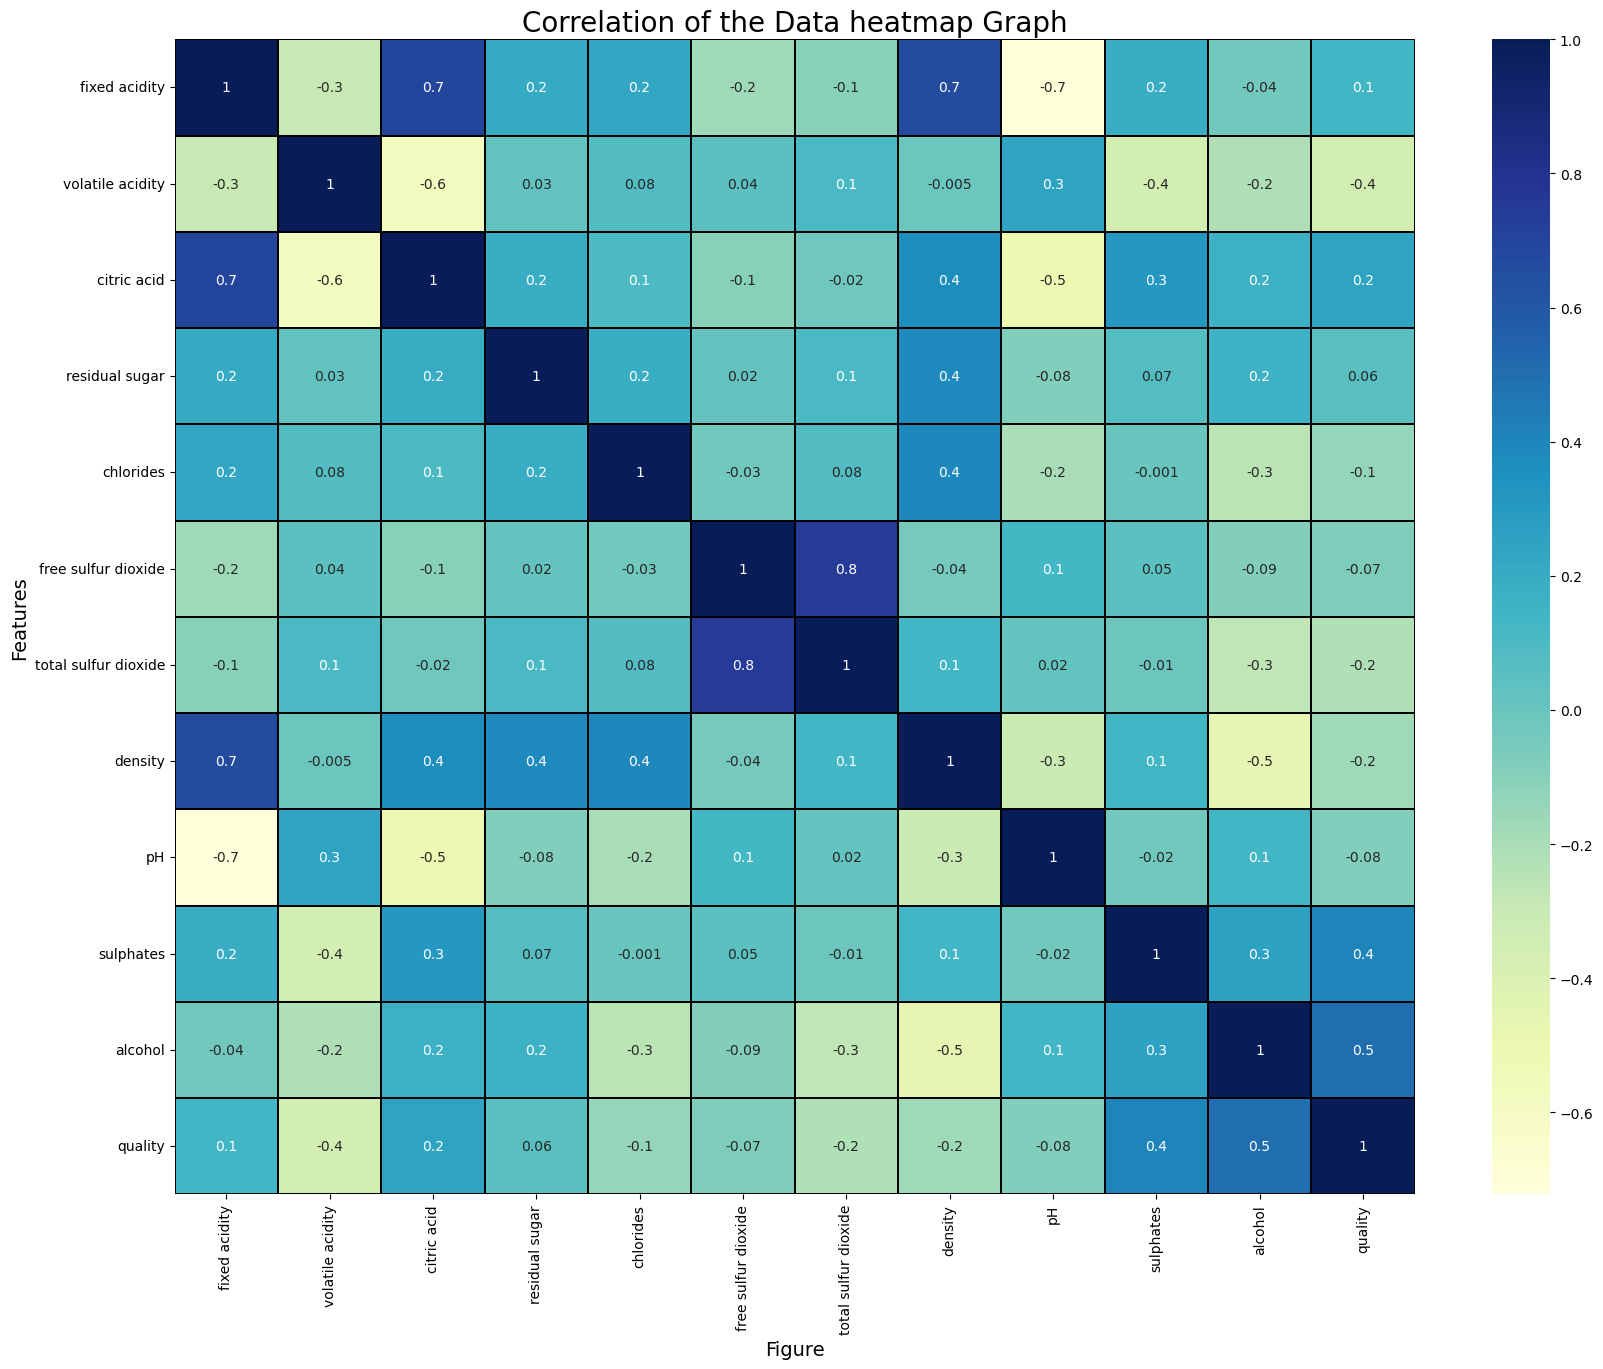

In [126]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(cor, linewidths = 0.2, fmt = ".1g", linecolor = 'black', annot = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation of the Data heatmap Graph', fontsize=20)
plt.show()

# comments on correlation heat map graph

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to target label.

1. This heatmap contains both positive and negative correlation.
2. The target have more +ve correlation with alcohol and sulphate.
3. The columns alcohol (0.5), sulphates (0.4), citric acid(0.2), fixed acidity (0.1), and residual sugar(0.06) have   
   positive correlation with the label quality.
4. The target label is negative correlated with volatile acidity(-0.4), chlorides(-0.1), total sulfur dioxide(-0.2),free 
   sulfur dioxide (-0.07) density (-0.2), and ph(-0.08).
5. The column total sulfur dioxide and free sulfur dioxide (0.8) have strong correlation.
and the columns fixed acidity and density(0.7), fixed acidity and citric acid(0.7), and fixed acidity and ph(-0.7) have high correlation with each other.



In [127]:
cor['quality'].sort_values(ascending = False).to_frame()

quality
quality               1.000000
alcohol               0.500866
sulphates             0.402169
citric acid           0.243999
fixed acidity         0.138709
residual sugar        0.056116
free sulfur dioxide  -0.074490
pH                   -0.082164
chlorides            -0.138821
density              -0.167568
total sulfur dioxide -0.220936
volatile acidity     -0.353443

# comments
We can observe the positive and negative correlated features with the target.

1.Maximum positive correlation is with alcohol 0.500866
2.Maximum negative correlation is with volatile acidity -0.353443
3.Maximum positive correlation is around 50% and maximun negative correlation is basically 35%



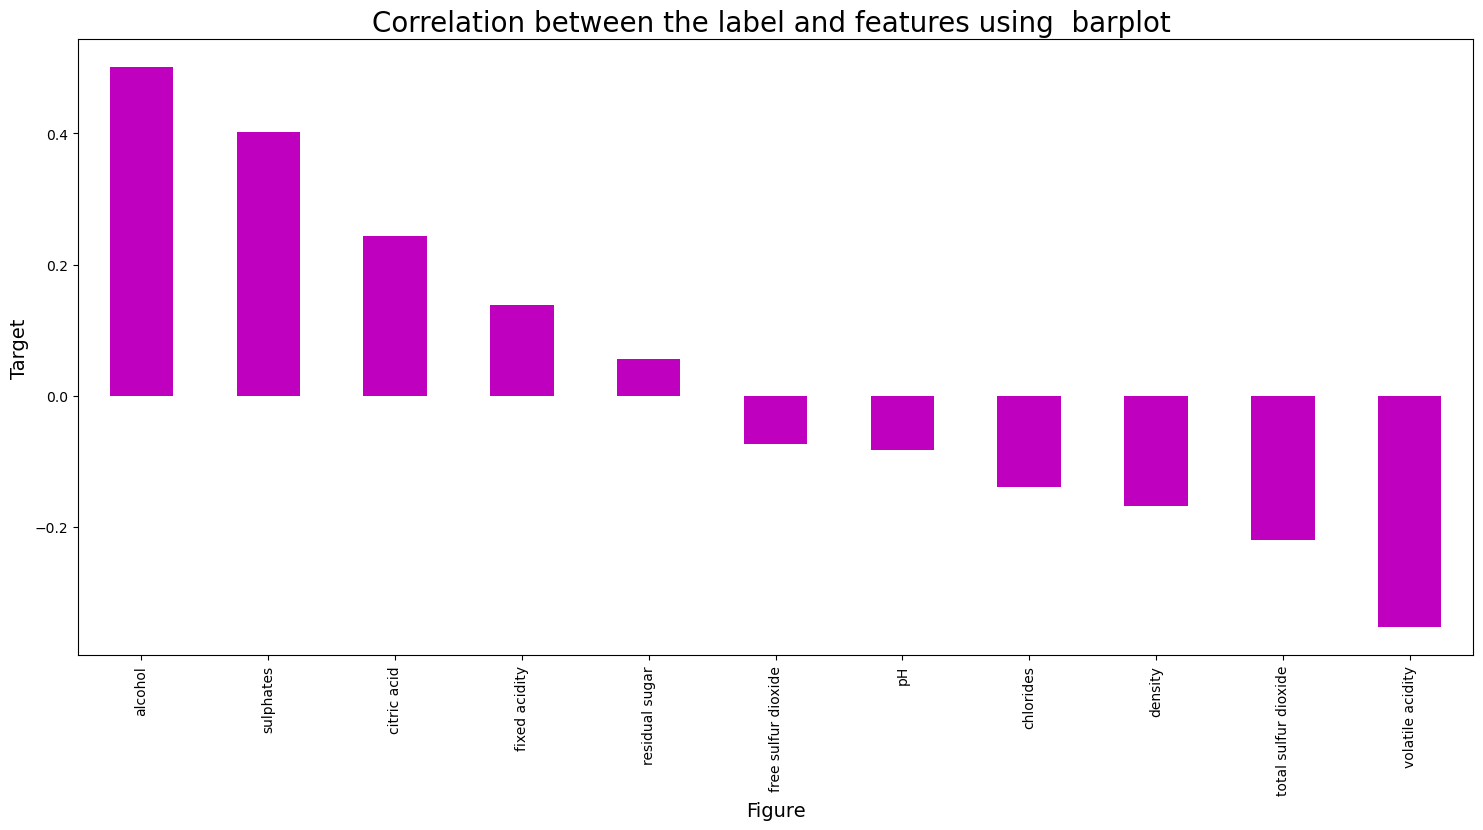

In [134]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(18,8))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar',color='m')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Target',fontsize = 14)
plt.title("Correlation between the label and features using  barplot ", fontsize = 20)
plt.show()

# Separating features and label

In [135]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [140]:
print('x:',x.shape)
print('y:',y.shape)
x.columns

x: (1451, 11)
y: (1451,)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Feature Scaling using Standard Scalarization

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.512418          1.050914    -1.390400       -0.622313  -0.178321   
1         -0.235682          2.119336    -1.390400        0.458715   0.925270   
2         -0.235682          1.407054    -1.180831        0.036163   0.651020   
3          1.666167         -1.442071     1.543569       -0.622313  -0.235816   
4         -0.512418          1.050914    -1.390400       -0.622313  -0.178321   
...             ...               ...          ...             ...        ...   
1446      -1.442504          0.457346    -0.971261       -0.445529   0.555613   
1447      -1.703224          0.160562    -0.866477       -0.117041  -1.062112   
1448      -1.358393         -0.076865    -0.709300        0.036163  -0.178321   
1449      -1.703224          0.724451    -0.761692       -0.445529  -0.235816   
1450      -1.614872         -1.264001     1.072038        1.580290  -0.725444   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.279490             -0.154751  0.635485  1.375896   
1                1.095777              0.931518  0.052390 -0.821951   
2                0.196390              0.559112  0.169009 -0.396561   
3                0.402805              0.737666  0.752103 -1.105544   
4               -0.279490             -0.154751  0.635485  1.375896   
...                   ...                   ...       ...       ...   
1446             1.588459              0.229486 -1.055489  0.950506   
1447             2.013608              0.464838 -0.927209  1.446794   
1448             1.387120              0.083586 -0.565690  0.737811   
1449             1.588459              0.229486 -0.723125  1.801286   
1450             0.499972              0.157694 -0.711464  0.525116   

      sulphates   alcohol  
0     -0.610651 -1.033942  
1      0.391017 -0.596512  
2      0.158237 -0.596512  
3     -0.429612 -0.596512  
4     -0.610651 -1.033942  
...         ...       ...  
1446  -0.429612  0.127693  
1447   0.964840  0.805142  
1448   0.896507  0.616005  
1449   0.613746 -0.176583  
1450   0.237003  0.616005  

[1451 rows x 11 columns]

# comments
Now scaled the data using the Standard Scalarization method to overcome the issue of biases.

# checking Multicollinearity by using Variance Inflation Factor (VIF)

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
0          fixed acidity    7.955760
7                density    6.661025
8                     pH    3.377528
10               alcohol    3.293553
2            citric acid    3.096952
6   total sulfur dioxide    2.872470
5    free sulfur dioxide    2.570758
1       volatile acidity    1.847969
3         residual sugar    1.774203
9              sulphates    1.353941
4              chlorides    1.235188

# comments
By checking VIF values we observe the features fixed acidity and density are highly correlated VIF is between 5 and 10. 
We will drop the fixed acidity column first, and then check if the multicollinearity issue present. 

In [143]:
# Dropping fixed acidity column
x.drop('fixed acidity', axis=1, inplace=True)

In [144]:
# Again checking VIF value if the multicollinearity still present or not 
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
1           citric acid    2.824596
6               density    2.778408
5  total sulfur dioxide    2.766327
4   free sulfur dioxide    2.540862
9               alcohol    2.436916
0      volatile acidity    1.847303
2        residual sugar    1.554973
7                    pH    1.532350
8             sulphates    1.337165
3             chlorides    1.225332

# comments
Here we can see after removing the fixed acidity column solved the multicollinearit issue.

*IF VIF is less than 10 we will not remove any columns, and proceed further.
Now We can continue with model building.

# lets see Oversampling in target variable
Now I moved to resolve the imbalance issue.as mentioned our problem is classification, we will balance the data using oversampling method.

In [146]:
# Frequency table of quality.
y.value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

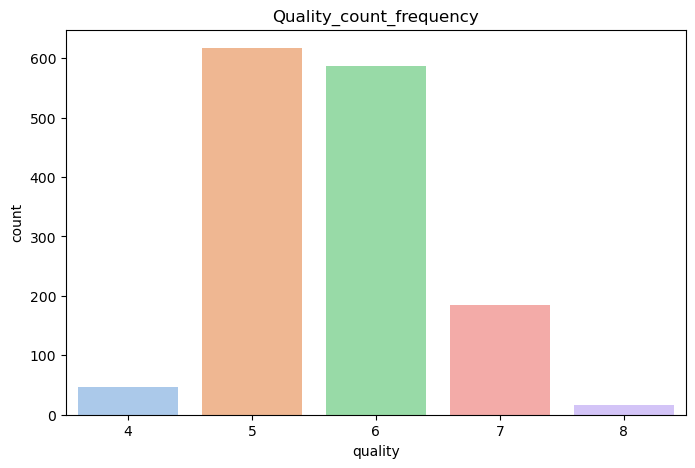

In [145]:
# check blance data in target variable
plt.figure(figsize = (8, 5))
sns.countplot(df,x='quality')
plt.title(f"Quality_count_frequency")
plt.show()

# comments
Here we can see data is imbalanced so we have to balance the data using SMOTE.

then we will categorise the data between good quality wine and bad quality wine. so for that lets consider that if the quality score is below 7 than the quality is bad and if socre is above 7 than the wine is of good quality.


In [147]:
# Oversampling the data
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [156]:
print('X1:',x1.shape)
print('Y1:',y1.shape)

X1: (3085, 10)
Y1: (3085,)


As we use upscaling(SMOTE) so this increase the no. of samples to improve the accuracy

In [148]:
# Check new frequency data with samples.
y1.value_counts()

quality
5    617
6    617
7    617
4    617
8    617
Name: count, dtype: int64

In [150]:
# concate both oversampling data
df_blance = pd.concat([x1, y1], axis=1)


In [155]:
df_blance.sort_values(by='quality')

volatile acidity  citric acid  residual sugar  chlorides  \
1542          1.846771    -1.284858       -0.436714  -0.875306   
1626          2.496898    -1.048956       -0.320997  -1.080611   
1625          0.137135     0.605742        1.411247   0.034579   
1624          0.624313     0.007232        0.462986   0.530545   
1623          0.636400     0.434937       -0.221289   0.497627   
...                ...          ...             ...        ...   
2675          0.603476    -0.959749       -0.297594  -1.168369   
2676         -1.021215     1.383554        0.435831  -0.534192   
2677          0.373903     2.027361        2.546320   0.245553   
2670         -0.988926     1.106886        3.476602  -0.266961   
3084         -0.768001     1.249452       -0.645482  -0.481658   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1542            -1.077010             -1.409003  0.435041  0.359004   
1626            -0.981051             -1.172139 -0.376314  1.499363   
1625             0.730453              0.342098  0.643156 -1.031281   
1624             0.196645              0.552354  0.476581 -0.525096   
1623             0.236304              0.533561  0.448314 -0.110617   
...                   ...                   ...       ...       ...   
2675             1.351649              0.494286 -1.682473  1.159704   
2676            -1.282084             -1.105998  0.258465 -1.168762   
2677            -1.105342             -0.934428  1.100896 -0.742756   
2670            -1.263783             -1.277934  0.603630 -0.617845   
3084            -0.941900             -1.105998 -1.025065 -0.805822   

      sulphates   alcohol  quality  
1542  -2.776094 -1.189961        4  
1626  -0.076245  0.544926        4  
1625  -0.848533 -1.004136        4  
1624  -0.866018 -1.180497        4  
1623  -0.630296 -0.199663        4  
...         ...       ...      ...  
2675   0.930565  2.156461        8  
2676   0.163800  0.640233        8  
2677   0.427470  2.426331        8  
2670   1.248978  2.119765        8  
3084   0.426666  1.785084        8  

[3085 rows x 11 columns]

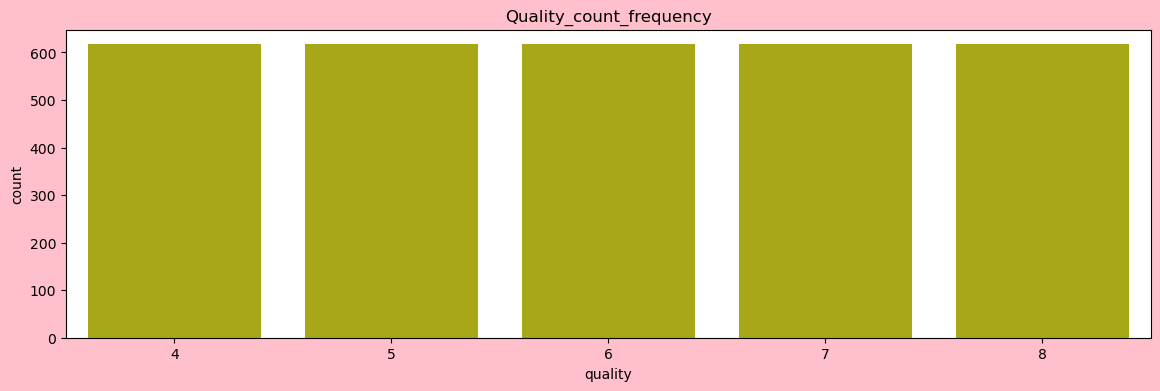

In [153]:
# visualization of quality again
plt.figure(figsize = (14, 4),facecolor='pink')
sns.countplot(df_blance, x='quality', color='y')
plt.title(f"Quality_count_frequency")
plt.show()

# comments
data is balanced now we can build machine learning classification models

In [158]:
# the output value is 1 if the wine quality is greater than 7 or less than 7 so value will be 0
wine_quality=[]
for i in df_blance["quality"]:
    if i >=7:
        wine_quality.append(1)
    else:
        wine_quality.append(0)
df_blance['quality_b']= wine_quality

In [159]:
df_blance.sort_values(by='quality', ascending=False)

volatile acidity  citric acid  residual sugar  chlorides  \
3084         -0.768001     1.249452       -0.645482  -0.481658   
2741         -1.119929     0.562377       -0.692850  -1.005087   
2751         -0.192431     1.622448        3.156505   0.051247   
2750         -0.618580     0.249754       -0.439210  -0.256309   
2749         -1.027476     1.081933        3.492095  -0.282363   
...                ...          ...             ...        ...   
1637          2.149038    -0.290119       -0.241748   0.468960   
1638         -0.019829     0.944824        1.397355  -0.180232   
1639          0.749408    -0.195200        0.171036   0.614806   
1640          2.494852    -0.790263       -0.652781  -0.032236   
1542          1.846771    -1.284858       -0.436714  -0.875306   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3084            -0.941900             -1.105998 -1.025065 -0.805822   
2741            -1.702896             -1.281126 -0.264619 -0.730413   
2751            -1.169632             -1.090503  0.916607 -0.649557   
2750             0.036582             -0.759143 -1.819582 -0.630897   
2749            -1.268340             -1.287006  0.588483 -0.616310   
...                   ...                   ...       ...       ...   
1637            -0.699197             -0.642932 -0.090172 -0.223278   
1638             0.839269              0.464580  0.681313 -1.257535   
1639            -0.043012              0.846720  0.427426 -0.674515   
1640            -1.172301             -0.841625 -0.313947 -0.196173   
1542            -1.077010             -1.409003  0.435041  0.359004   

      sulphates   alcohol  quality  quality_b  
3084   0.426666  1.785084        8          1  
2741   2.292624 -0.170740        8          1  
2751   0.850653  2.408788        8          1  
2750   0.587991  1.467031        8          1  
2749   1.268257  2.105776        8          1  
...         ...       ...      ...        ...  
1637  -1.539198 -0.479657        4          0  
1638  -0.519338 -0.526759        4          0  
1639  -0.601967 -1.220357        4          0  
1640  -1.754991 -0.687228        4          0  
1542  -2.776094 -1.189961        4          0  

[3085 rows x 12 columns]

# Machine Learning Model Building

# Modeling
Finding the best random state

In [161]:
X = df_blance.drop(['quality', 'quality_b'], axis = 1)
Y = df_blance['quality_b']

In [162]:
# we can see Now our output is having only two values "0" and "1", we will use binary classification model.

In [169]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [166]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        r_pred = model.predict(x_test)
        acc = accuracy_score(y_test, r_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9654 at random_state 5


In [171]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        l_pred = model.predict(x_test)
        acc = accuracy_score(y_test, l_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = LogisticRegression()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9082 at random_state 19


In [172]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        k_pred = model.predict(x_test)
        acc = accuracy_score(y_test, k_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = KNeighborsClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9363 at random_state 153


In [173]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        d_pred = model.predict(x_test)
        acc = accuracy_score(y_test, d_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = DecisionTreeClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9438 at random_state 117


In [174]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        G_pred = model.predict(x_test)
        acc = accuracy_score(y_test, G_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = GradientBoostingClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9395 at random_state 70


In [175]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        s_pred = model.predict(x_test)
        acc = accuracy_score(y_test, s_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = SVC()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9395 at random_state 70


In [ ]:
# comments
we have checked best accuracy with random state so we get best accuracy by RandomForestClassifier model. 


# Creating train test split

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (2159, 10)
x_test shape:   (926, 10)
y_train shape:  (2159,)
y_test shape:   (926,)


# Classification Algorithms

In [181]:
#pip install xgboost

In [186]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

In [187]:
#Searching for the model with the best accuracy. We define a dictionary with all the models to implement.

key = ['KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'XGBClassifier', 'SVC']
value = [KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), SVC()]

models = dict(zip(key,value))

Classification Problem by selecting the classification model as KNeighborsClassifier, LogisticRegression, RandomForestClassifier, GaussianNB, DecisionTreeClassifier, XGBClassifier and SVC. We will fit the training and testing data one by one into the model and compare its accuracy.

# Model selection

In [188]:
training_scores=[]
testing_scores=[]

for key, value in models.items():
    value.fit(x_train, y_train)
    train_score=value.score(x_train, y_train)
    test_score=value.score(x_test, y_test)
    training_scores.append(train_score)
    training_scores.append(test_score)
    
    print(f'{key}\n')
    print(f"Training Score: {train_score}")
    print(f"Testing_score: {test_score}\n")

KNeighborsClassifier

Training Score: 0.9333024548402038
Testing_score: 0.9222462203023758

RandomForestClassifier

Training Score: 1.0
Testing_score: 0.9632829373650108

GaussianNB

Training Score: 0.8601204261232052
Testing_score: 0.8736501079913607

DecisionTreeClassifier

Training Score: 1.0
Testing_score: 0.9254859611231101

XGBClassifier

Training Score: 1.0
Testing_score: 0.9643628509719222

SVC

Training Score: 0.9184807781380269
Testing_score: 0.9395248380129589



# Cross Validation

In [190]:
cv_scores =[]
for key, value in models.items():
    cvs=cross_val_score(value, X,Y, cv=5)
    
    cv_scores.append(cvs.mean())
    print(f'{key}\n')
    print(f"CV Score: {cvs.mean()} \n")

KNeighborsClassifier

CV Score: 0.8904376012965965 

RandomForestClassifier

CV Score: 0.9296596434359806 

GaussianNB

CV Score: 0.8573743922204213 

DecisionTreeClassifier

CV Score: 0.9056726094003242 

XGBClassifier

CV Score: 0.9303079416531606 

SVC

CV Score: 0.8946515397082658 



#here we got highr cross validation score by XGBClassifier is 0.93.3 lets move to the Hyper tunning

# Hyper parameter Tuning
Tuning the XGBClassifier Model

In [193]:
xgb=XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
pred=xgb.predict(x_test)
print('accuracy score :',accuracy_score(y_test, pred))
print('confussion matric :',confusion_matrix(y_test, pred))
print('classification reports :',classification_report(y_test, pred))

accuracy score : 0.9643628509719222
confussion matric : [[515  17]
 [ 16 378]]
classification reports :               precision    recall  f1-score   support

           0       0.97      0.97      0.97       532
           1       0.96      0.96      0.96       394

    accuracy                           0.96       926
   macro avg       0.96      0.96      0.96       926
weighted avg       0.96      0.96      0.96       926



In [198]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.3],'subsample': [0.8, 1],}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}


These are the best parameters for training the model.

In [199]:
# check again cros validation score for  XGBClassifier 
scores = cross_val_score(xgb, x_train, y_train, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.95601852 0.95138889 0.91898148 0.95138889 0.93271462]


In [200]:
best_model = XGBClassifier(max_depth = 7, learning_rate = 0.3, n_estimators = 300,subsample = 1)
best_model.fit(x_train, y_train)
best_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, best_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 96.65%


# Plotting ROC and compare AUC for the best model

In [206]:
# Plotting for all the models used here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

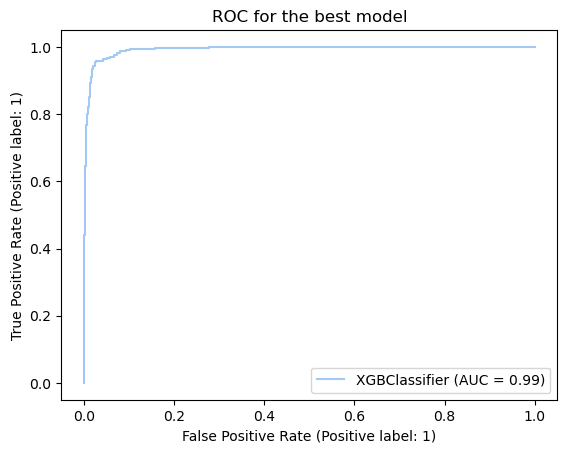

In [210]:
# Let's check the AUC for the best model after hyer parameter tuning
RocCurveDisplay.from_estimator(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

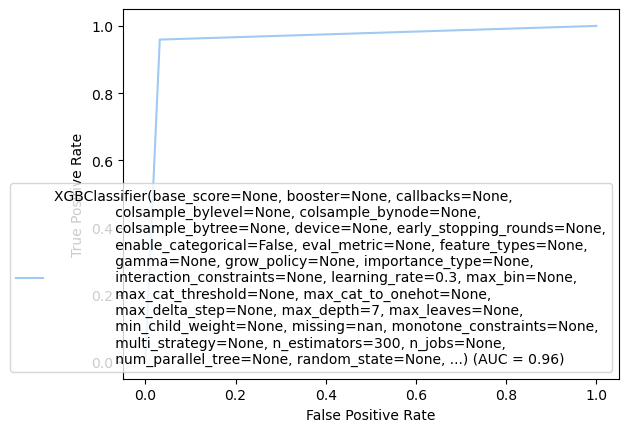

In [211]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_model)
display.plot()

#Here we have plotted the ROC curve for the final model and the AUC value for the best model is 96%.

# Now Save the model

In [212]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Red_Wine_Quality_Analysis.pkl")

['Red_Wine_Quality_Analysis.pkl']

# Predicting the saved model

In [213]:
# Lets load the saved model and get the predictions
model = joblib.load("Red_Wine_Quality_Analysis.pkl")

In [214]:
# Prediction
prediction = model.predict(x_test)

In [215]:
# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {round(accuracy_score(y_test, prediction),4)}")

Accuracy score: 0.9665


In [216]:
# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

0    1    2    3    4    5    6    7    8    9    ...  916  917  \
Predicted    0    0    0    1    1    1    1    0    0    1  ...    0    0   
Original     0    0    0    1    1    0    1    0    0    1  ...    0    0   

           918  919  920  921  922  923  924  925  
Predicted    0    0    1    1    1    0    0    0  
Original     0    0    1    1    1    0    0    0  

[2 rows x 926 columns]

# comments
These are the predicted values of the quality of the wine in a dataset to compared the prediction with the test data.

In [ ]:
------------------------------------------------------Completed------------------------------------------------------------

if here need any improvement or i ussed wrong approad wrong method so please suggest me where i make mistake.. Your feedback will be very valuable for me it will help to improve and progress my python knowledge. Thanks